In [699]:
import tensorflow as tf

In [700]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [701]:
import cv2

In [702]:
from tqdm import tqdm
import os
import seaborn as sns
sns.set(style="whitegrid")
import glob as gb

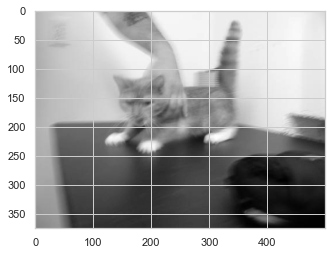

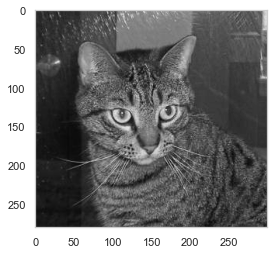

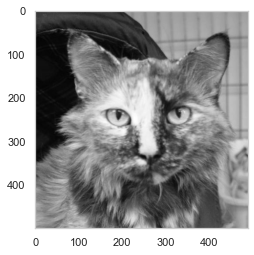

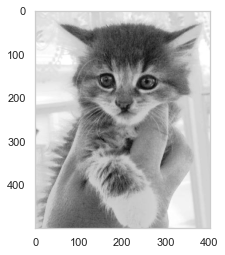

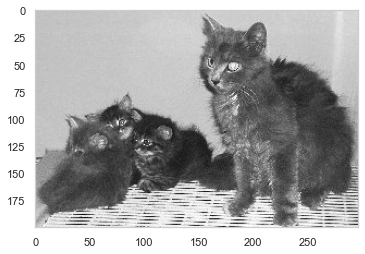

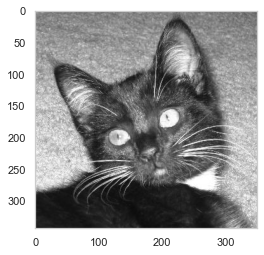

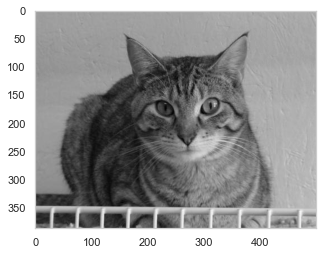

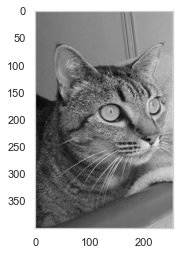

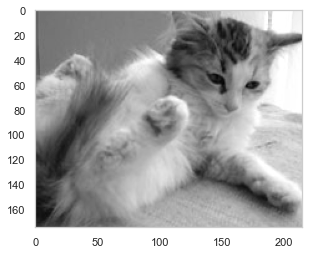

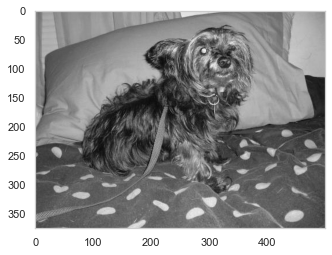

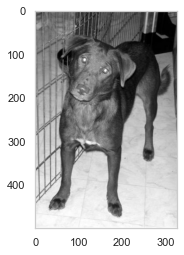

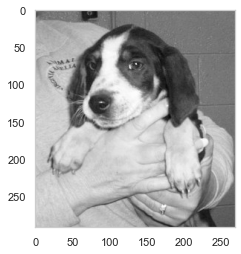

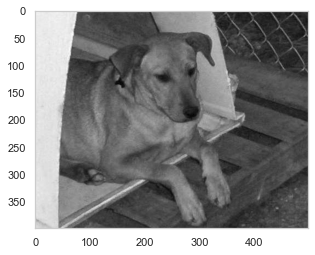

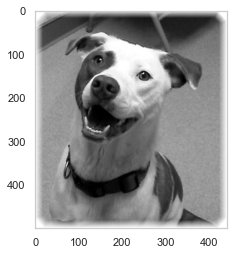

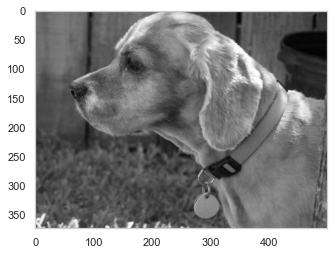

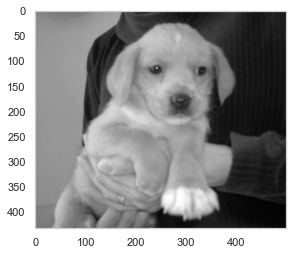

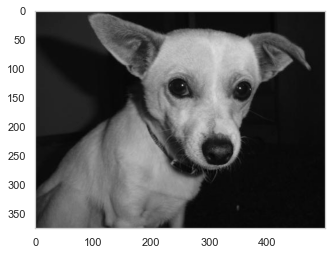

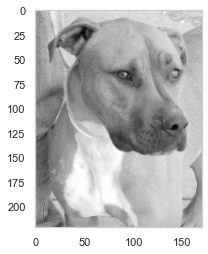

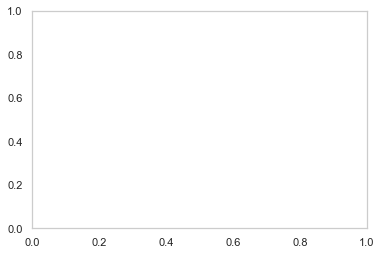

In [703]:
director = 'J:/Data science/data/DL/cat_dog_data2'
categories = ['cat' , 'dog']
for category in categories:
    path = os.path.join(director,category)
    x=0
    for img in os.listdir(path):
        x+=1
        img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        plt.grid(False)
        if x==9:
            break

In [704]:
img_array

array([[170, 168, 148, ..., 204, 205, 207],
       [159, 153, 142, ..., 201, 192, 193],
       [161, 156, 153, ..., 204, 202, 202],
       ...,
       [111, 113, 117, ..., 188, 189, 188],
       [129, 131, 131, ..., 186, 187, 188],
       [139, 139, 135, ..., 180, 188, 189]], dtype=uint8)

In [705]:
img_array.shape

(222, 170)

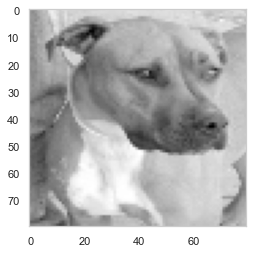

In [706]:
img_size = 80
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.grid(False)

In [707]:
training_data = []
def creat_traning_data():
    for category in categories:
        path = os.path.join(director,category)
        class_map = categories.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_map])
            except Exception as e:
                pass
creat_traning_data()
print(len(training_data))
        

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1136.73it/s]

999


In [708]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
0
1
1
1
0
1


In [709]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)

In [710]:
# x

In [711]:
type(x)

list

In [712]:
# y

In [713]:
type(y)

list

In [714]:
x = np.array(x)
y = np.array(y)

In [715]:
print(type(x))
print(x[:2])

<class 'numpy.ndarray'>
[[[ 81  79  21 ...  21 113 133]
  [ 97  97  22 ...  16 126 147]
  [103  97  19 ...  24 140 147]
  ...
  [ 46  45  47 ...  27  24  22]
  [ 43  47  42 ...  25  20  20]
  [ 40  47  50 ...  22  22  18]]

 [[160 158 172 ... 169 175 168]
  [164 175 168 ...  95 120 134]
  [169 164 168 ... 190 149 157]
  ...
  [ 64  59  57 ...  59  99 128]
  [ 54  59  61 ... 127  91 113]
  [ 59  62  61 ... 111  92 110]]]


In [716]:
print(type(y))
print(y[:10])

<class 'numpy.ndarray'>
[1 0 0 1 0 1 1 1 0 1]


In [717]:
print(len(x) , len(y))

999 999


In [718]:
x = x/255

In [719]:
x.shape

(999, 80, 80)

In [720]:
img_size

80

In [721]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [722]:
x_train.shape

(669, 80, 80)

In [723]:
x_test.shape

(330, 80, 80)

In [724]:
y_train.shape

(669,)

In [725]:
y_test.shape

(330,)

In [726]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_size,img_size)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(2 , activation='softmax')
])

In [727]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [728]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [729]:
model_history = model.fit(x_train,y_train,
                          validation_split=0.1,
                          callbacks=[lr_scheduler],
                          epochs=15)
model_history

Epoch 1/15
19/19 [==============================] - 1s 14ms/step - loss: 0.9227 - accuracy: 0.5432 - val_loss: 0.9619 - val_accuracy: 0.5075 - lr: 0.0010
Epoch 2/15
19/19 [==============================] - 0s 7ms/step - loss: 0.7572 - accuracy: 0.5166 - val_loss: 0.7007 - val_accuracy: 0.4776 - lr: 0.0011
Epoch 3/15
19/19 [==============================] - 0s 7ms/step - loss: 0.7303 - accuracy: 0.5432 - val_loss: 0.7222 - val_accuracy: 0.5224 - lr: 0.0013
Epoch 4/15
19/19 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5432 - val_loss: 0.6862 - val_accuracy: 0.5373 - lr: 0.0014
Epoch 5/15
19/19 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5681 - val_loss: 0.6802 - val_accuracy: 0.5373 - lr: 0.0016
Epoch 6/15
19/19 [==============================] - 0s 7ms/step - loss: 0.7051 - accuracy: 0.5997 - val_loss: 0.8007 - val_accuracy: 0.4925 - lr: 0.0018
Epoch 7/15
19/19 [==============================] - 0s 6ms/step - loss: 0.7009 - 

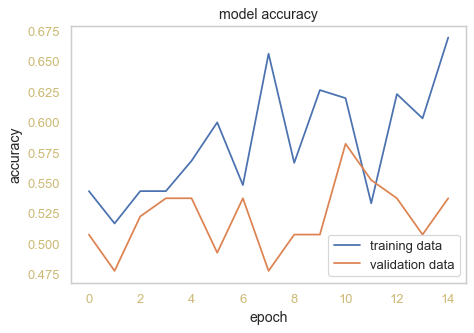

In [730]:
plt.figure(dpi=85)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.xticks(c='y')
plt.yticks(c='y')
plt.legend(['training data', 'validation data'], loc = 'lower right')

In [731]:
2.1e-3

0.0021

In [732]:
1.5e-3

0.0015

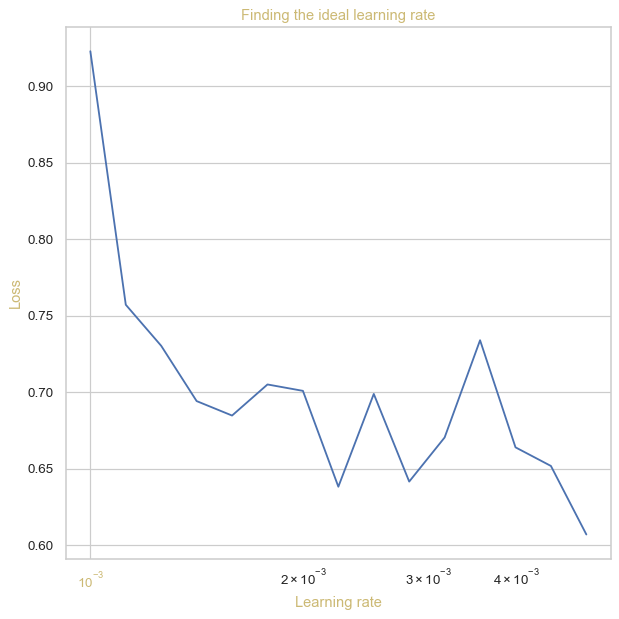

In [733]:
# 15 is the number of epochs
plt.figure(figsize=(8,8),dpi=88)
lrs = 1e-3 * (10**(np.arange(15)/20))
plt.semilogx(lrs, model_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate" , c='y')
plt.ylabel("Loss", c='y')
plt.title("Finding the ideal learning rate", c='y')
plt.xticks(c='y')
plt.grid(True)

In [734]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_size,img_size)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(96,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(2 , activation='softmax')
])

In [735]:
model_2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [736]:
model_2_history = model_2.fit(x_train,y_train,
                          validation_split=0.1,
                          epochs=6)
model_2_history

Epoch 1/6
19/19 [==============================] - 1s 14ms/step - loss: 0.7527 - accuracy: 0.5266 - val_loss: 0.7157 - val_accuracy: 0.4925
Epoch 2/6
19/19 [==============================] - 0s 7ms/step - loss: 0.7054 - accuracy: 0.5166 - val_loss: 0.6957 - val_accuracy: 0.5075
Epoch 3/6
19/19 [==============================] - 0s 7ms/step - loss: 0.7162 - accuracy: 0.5615 - val_loss: 0.6938 - val_accuracy: 0.5672
Epoch 4/6
19/19 [==============================] - 0s 7ms/step - loss: 0.7207 - accuracy: 0.5133 - val_loss: 0.6943 - val_accuracy: 0.5522
Epoch 5/6
19/19 [==============================] - 0s 8ms/step - loss: 0.7028 - accuracy: 0.5399 - val_loss: 0.7123 - val_accuracy: 0.5672
Epoch 6/6
19/19 [==============================] - 0s 7ms/step - loss: 0.6829 - accuracy: 0.5664 - val_loss: 0.6859 - val_accuracy: 0.4776


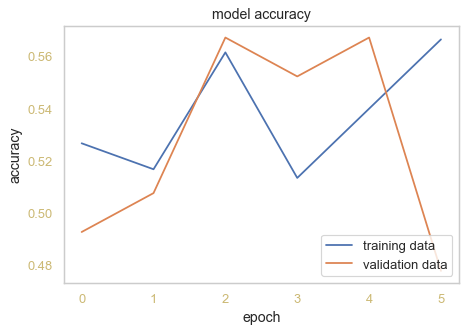

In [737]:
plt.figure(dpi=85)
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_2_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.xticks(c='y')
plt.yticks(c='y')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.grid()

In [738]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.8090 - accuracy: 0.5212


[0.8089894652366638, 0.521212100982666]

In [739]:
y_probs = model.predict(x_test)
y_probs

11/11 [==============================] - 0s 1ms/step


array([[0.7763595 , 0.22364046],
       [0.84566444, 0.15433562],
       [0.78459984, 0.21540019],
       [0.7613626 , 0.23863739],
       [0.64899766, 0.35100237],
       [0.66768664, 0.3323134 ],
       [0.63422215, 0.36577785],
       [0.7042596 , 0.29574046],
       [0.7188651 , 0.28113493],
       [0.8041698 , 0.19583017],
       [0.78375113, 0.21624893],
       [0.69667614, 0.30332384],
       [0.68052334, 0.31947666],
       [0.6183239 , 0.38167602],
       [0.72261554, 0.27738446],
       [0.69095486, 0.30904517],
       [0.76175934, 0.2382407 ],
       [0.8468765 , 0.15312351],
       [0.8255108 , 0.17448922],
       [0.7310507 , 0.26894927],
       [0.716089  , 0.28391102],
       [0.9505202 , 0.04947976],
       [0.6976197 , 0.30238032],
       [0.71792257, 0.2820774 ],
       [0.7301547 , 0.2698453 ],
       [0.8658899 , 0.13411011],
       [0.6951092 , 0.3048908 ],
       [0.66507876, 0.3349212 ],
       [0.8193107 , 0.18068926],
       [0.6955838 , 0.3044162 ],
       [0.

In [740]:
y_pred = y_probs.argmax(axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [741]:
from sklearn.metrics import confusion_matrix , accuracy_score
conf = confusion_matrix(y_test,y_pred)
conf

array([[162,   9],
       [149,  10]], dtype=int64)

In [742]:
accuracy_score(y_test,y_pred)

0.5212121212121212

In [743]:
model_2.evaluate(x_test,y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5303


[0.6902812719345093, 0.5303030014038086]

In [750]:
y_probs = model_2.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [751]:
y_pred = y_probs.argmax(axis=1)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,

In [752]:
y_test.shape

(330,)

In [753]:
y_pred.shape

(330,)

In [754]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[115,  56],
       [ 99,  60]], dtype=int64)

In [755]:
accuracy_score(y_test,y_pred)

0.5303030303030303

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())